In [2]:
import pandas as pd
import numpy as np

In [3]:
grid = pd.read_csv("../data/grid.csv")
grid.head()

,Unnamed: 0,grid_id,lat_bin,lon_bin,lat_center,lon_center,mp_mean_concentration,mp_max_concentration,mp_count,mp_type_count,iucn_species_count,iucn_mean_risk,iucn_max_risk,eco_count,eco_mean_size,eco_small_ratio,eco_fiber_ratio,ecotaxa_present,hazard_index
0,0,-90.0_-180.0,-90.0,-180.0,-89.75,-179.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,-90.0_-179.5,-90.0,-179.5,-89.75,-179.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,-90.0_-179.0,-90.0,-179.0,-89.75,-178.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,-90.0_-178.5,-90.0,-178.5,-89.75,-178.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,-90.0_-178.0,-90.0,-178.0,-89.75,-177.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
grid.shape

(259200, 19)

In [5]:
# Separar datos observados reales vs no observados
observed_mask = (
    grid["mp_count"].notna() |
    grid["iucn_species_count"].notna()
)

grid["observed"] = observed_mask
grid["inferred"] = ~observed_mask

grid["observed"].value_counts()


observed
False    248306
True      10894
Name: count, dtype: int64

In [6]:
# Construir el risk score observado
# Normalizar componentes

def norm(series):
    return (series - series.min()) / (series.max() - series.min())

grid["mp_norm"] = norm(grid["mp_mean_concentration"])
grid["iucn_norm"] = norm(grid["iucn_species_count"])
grid["hazard_norm"] = norm(grid["hazard_index"])

grid[grid["mp_norm"] > 0].head()

,Unnamed: 0,grid_id,lat_bin,lon_bin,lat_center,lon_center,mp_mean_concentration,mp_max_concentration,mp_count,mp_type_count,...,eco_mean_size,eco_small_ratio,eco_fiber_ratio,ecotaxa_present,hazard_index,observed,inferred,mp_norm,iucn_norm,hazard_norm
35237,35237,-66.0_158.5,-66.0,158.5,-65.75,158.75,0.00931,0.00931,1.0,1.0,...,NaN,NaN,NaN,NaN,0.00931,True,False,6.453625e-08,NaN,6.453625e-08
35511,35511,-65.5_-64.5,-65.5,-64.5,-65.25,-64.25,0.11600,0.11600,1.0,1.0,...,NaN,NaN,NaN,NaN,0.11600,True,False,8.041037e-07,NaN,8.041037e-07
36232,36232,-65.0_-64.0,-65.0,-64.0,-64.75,-63.75,0.01050,0.01300,2.0,1.0,...,NaN,NaN,NaN,NaN,0.01050,True,False,7.278525e-08,NaN,7.278525e-08
36233,36233,-65.0_-63.5,-65.0,-63.5,-64.75,-63.25,0.01100,0.01100,1.0,1.0,...,NaN,NaN,NaN,NaN,0.01100,True,False,7.625121e-08,NaN,7.625121e-08
36234,36234,-65.0_-63.0,-65.0,-63.0,-64.75,-62.75,0.01800,0.03100,2.0,1.0,...,NaN,NaN,NaN,NaN,0.01800,True,False,1.247747e-07,NaN,1.247747e-07


In [7]:
# Risk score

grid["risk_observed"] = (
    grid["mp_norm"] *
    grid["hazard_norm"] *
    (1 + grid["iucn_norm"])
)

grid.loc[~grid["observed"], "risk_observed"] = np.nan

grid[grid["risk_observed"] > 0]


,Unnamed: 0,grid_id,lat_bin,lon_bin,lat_center,lon_center,mp_mean_concentration,mp_max_concentration,mp_count,mp_type_count,...,eco_small_ratio,eco_fiber_ratio,ecotaxa_present,hazard_index,observed,inferred,mp_norm,iucn_norm,hazard_norm,risk_observed
75125,75125,-38.0_-57.5,-38.0,-57.5,-37.75,-57.25,0.092006,0.092006,1.0,1.0,...,NaN,NaN,NaN,0.092006,True,False,6.377790e-07,0.000000,6.377790e-07,4.067621e-13
79443,79443,-35.0_-58.5,-35.0,-58.5,-34.75,-58.25,0.125046,0.125046,1.0,1.0,...,NaN,NaN,NaN,0.125046,True,False,8.668099e-07,0.046875,8.668099e-07,7.865794e-13
80316,80316,-34.5_18.0,-34.5,18.0,-34.25,18.25,0.033217,0.033217,1.0,1.0,...,NaN,NaN,NaN,0.033217,True,False,2.302579e-07,0.187500,2.302579e-07,6.295969e-14
80324,80324,-34.5_22.0,-34.5,22.0,-34.25,22.25,0.111713,0.111713,1.0,1.0,...,NaN,NaN,NaN,0.111713,True,False,7.743865e-07,0.031250,7.743865e-07,6.184143e-13
80326,80326,-34.5_23.0,-34.5,23.0,-34.25,23.25,0.025293,0.025293,1.0,1.0,...,NaN,NaN,NaN,0.025293,True,False,1.753293e-07,0.093750,1.753293e-07,3.362226e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226466,226466,67.0_13.0,67.0,13.0,67.25,13.25,0.022234,0.022234,1.0,1.0,...,NaN,NaN,NaN,0.022234,True,False,1.541245e-07,0.000000,1.541245e-07,2.375436e-14
226467,226467,67.0_13.5,67.0,13.5,67.25,13.75,0.014854,0.014854,1.0,1.0,...,NaN,NaN,NaN,0.014854,True,False,1.029669e-07,0.000000,1.029669e-07,1.060218e-14
226468,226468,67.0_14.0,67.0,14.0,67.25,14.25,0.022057,0.022057,1.0,1.0,...,NaN,NaN,NaN,0.022057,True,False,1.528975e-07,0.015625,1.528975e-07,2.374294e-14
227908,227908,68.0_14.0,68.0,14.0,68.25,14.25,0.003265,0.003265,1.0,1.0,...,NaN,NaN,NaN,0.003265,True,False,2.263275e-08,0.000000,2.263275e-08,5.122412e-16


In [8]:
from sklearn.neighbors import NearestNeighbors
# Inferencia espacial controlada (kNN)
# Preparar coordenadas

coords = grid[["lat_center", "lon_center"]].values
coords

array([[ -89.75, -179.75],
       [ -89.75, -179.25],
       [ -89.75, -178.75],
       ...,
       [  89.75,  178.75],
       [  89.75,  179.25],
       [  89.75,  179.75]], shape=(259200, 2))

In [9]:
# kNN usando solo celdas observadas como fuente
observed_coords = grid.loc[grid["observed"], ["lat_center", "lon_center"]].values
observed_risk = grid.loc[grid["observed"], "risk_observed"].values

knn = NearestNeighbors(n_neighbors=8, metric="haversine") # Harvesine mide distancia sobre una esfera
knn.fit(np.radians(observed_coords))

distances, indices = knn.kneighbors(np.radians(coords)) # Busca vecinos para todas las celdas
observed_coords

array([[ -71.75, -143.75],
       [ -70.25, -159.25],
       [ -69.75, -165.25],
       ...,
       [  88.75,   61.75],
       [  89.75,   43.75],
       [  89.75,   52.25]], shape=(10894, 2))

Transfiere el riesgo observado desde celdas con datos reales hacia celdas sin datos, usando proximidad espacial, usa vecinos reales observados como referencia.
Para cada celda del grid: busca sus 8 vecinos observados más cercanos y devuelve dos matrices: distances e indices

In [10]:
# Inferir riesgo por promedio ponderado

weights = 1 / (distances + 1e-6)    # convierte distancia en peso, a vecino mas cercanos, peso mayor
weights = weights / weights.sum(axis=1, keepdims=True)  # normalixar pesos por celda

grid["risk_inferred"] = np.sum(
    observed_risk[indices] * weights,
    axis=1
)

# Mantener observado cuando exista
grid.loc[grid["observed"], "risk_inferred"] = grid["risk_observed"]

grid


,Unnamed: 0,grid_id,lat_bin,lon_bin,lat_center,lon_center,mp_mean_concentration,mp_max_concentration,mp_count,mp_type_count,...,eco_fiber_ratio,ecotaxa_present,hazard_index,observed,inferred,mp_norm,iucn_norm,hazard_norm,risk_observed,risk_inferred
0,0,-90.0_-180.0,-90.0,-180.0,-89.75,-179.75,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
1,1,-90.0_-179.5,-90.0,-179.5,-89.75,-179.25,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
2,2,-90.0_-179.0,-90.0,-179.0,-89.75,-178.75,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
3,3,-90.0_-178.5,-90.0,-178.5,-89.75,-178.25,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
4,4,-90.0_-178.0,-90.0,-178.0,-89.75,-177.75,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259195,259195,89.5_177.5,89.5,177.5,89.75,177.75,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
259196,259196,89.5_178.0,89.5,178.0,89.75,178.25,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
259197,259197,89.5_178.5,89.5,178.5,89.75,178.75,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN
259198,259198,89.5_179.0,89.5,179.0,89.75,179.25,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,NaN,NaN,0.0,NaN,NaN


In [11]:
# Construir features espaciales para ML
grid["dist_to_obs"] = distances[:, 0]

grid["neighbor_risk_mean"] = np.mean(
    observed_risk[indices], axis=1
)

grid["neighbor_risk_max"] = np.max(
    observed_risk[indices], axis=1
)
grid


,Unnamed: 0,grid_id,lat_bin,lon_bin,lat_center,lon_center,mp_mean_concentration,mp_max_concentration,mp_count,mp_type_count,...,observed,inferred,mp_norm,iucn_norm,hazard_norm,risk_observed,risk_inferred,dist_to_obs,neighbor_risk_mean,neighbor_risk_max
0,0,-90.0_-180.0,-90.0,-180.0,-89.75,-179.75,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.315003,NaN,NaN
1,1,-90.0_-179.5,-90.0,-179.5,-89.75,-179.25,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.314980,NaN,NaN
2,2,-90.0_-179.0,-90.0,-179.0,-89.75,-178.75,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.314958,NaN,NaN
3,3,-90.0_-178.5,-90.0,-178.5,-89.75,-178.25,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.314936,NaN,NaN
4,4,-90.0_-178.0,-90.0,-178.0,-89.75,-177.75,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.314914,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259195,259195,89.5_177.5,89.5,177.5,89.75,177.75,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.007758,NaN,NaN
259196,259196,89.5_178.0,89.5,178.0,89.75,178.25,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.007775,NaN,NaN
259197,259197,89.5_178.5,89.5,178.5,89.75,178.75,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.007793,NaN,NaN
259198,259198,89.5_179.0,89.5,179.0,89.75,179.25,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.007810,NaN,NaN


In [12]:
# Filtrar celdas con riesgo significativo

df_model = grid[grid["risk_inferred"].notna()].copy()
df_model

,Unnamed: 0,grid_id,lat_bin,lon_bin,lat_center,lon_center,mp_mean_concentration,mp_max_concentration,mp_count,mp_type_count,...,observed,inferred,mp_norm,iucn_norm,hazard_norm,risk_observed,risk_inferred,dist_to_obs,neighbor_risk_mean,neighbor_risk_max
75125,75125,-38.0_-57.5,-38.0,-57.5,-37.75,-57.25,0.092006,0.092006,1.0,1.0,...,True,False,6.377790e-07,0.000000,6.377790e-07,4.067621e-13,4.067621e-13,0.0,NaN,NaN
79443,79443,-35.0_-58.5,-35.0,-58.5,-34.75,-58.25,0.125046,0.125046,1.0,1.0,...,True,False,8.668099e-07,0.046875,8.668099e-07,7.865794e-13,7.865794e-13,0.0,NaN,NaN
80316,80316,-34.5_18.0,-34.5,18.0,-34.25,18.25,0.033217,0.033217,1.0,1.0,...,True,False,2.302579e-07,0.187500,2.302579e-07,6.295969e-14,6.295969e-14,0.0,NaN,NaN
80324,80324,-34.5_22.0,-34.5,22.0,-34.25,22.25,0.111713,0.111713,1.0,1.0,...,True,False,7.743865e-07,0.031250,7.743865e-07,6.184143e-13,6.184143e-13,0.0,NaN,NaN
80326,80326,-34.5_23.0,-34.5,23.0,-34.25,23.25,0.025293,0.025293,1.0,1.0,...,True,False,1.753293e-07,0.093750,1.753293e-07,3.362226e-14,3.362226e-14,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226466,226466,67.0_13.0,67.0,13.0,67.25,13.25,0.022234,0.022234,1.0,1.0,...,True,False,1.541245e-07,0.000000,1.541245e-07,2.375436e-14,2.375436e-14,0.0,NaN,NaN
226467,226467,67.0_13.5,67.0,13.5,67.25,13.75,0.014854,0.014854,1.0,1.0,...,True,False,1.029669e-07,0.000000,1.029669e-07,1.060218e-14,1.060218e-14,0.0,NaN,NaN
226468,226468,67.0_14.0,67.0,14.0,67.25,14.25,0.022057,0.022057,1.0,1.0,...,True,False,1.528975e-07,0.015625,1.528975e-07,2.374294e-14,2.374294e-14,0.0,NaN,NaN
227908,227908,68.0_14.0,68.0,14.0,68.25,14.25,0.003265,0.003265,1.0,1.0,...,True,False,2.263275e-08,0.000000,2.263275e-08,5.122412e-16,5.122412e-16,0.0,NaN,NaN


In [13]:
observed_df = grid[grid["observed"]]
inferred_df = grid[~grid["observed"]]

df_final = pd.concat([
    observed_df,
    inferred_df.sample(
        n=60000 - len(observed_df),
        random_state=42
    )
])
df_final

,Unnamed: 0,grid_id,lat_bin,lon_bin,lat_center,lon_center,mp_mean_concentration,mp_max_concentration,mp_count,mp_type_count,...,observed,inferred,mp_norm,iucn_norm,hazard_norm,risk_observed,risk_inferred,dist_to_obs,neighbor_risk_mean,neighbor_risk_max
25992,25992,-72.0_-144.0,-72.0,-144.0,-71.75,-143.75,0.0,0.0,1.0,1.0,...,True,False,0.0,NaN,0.0,NaN,NaN,0.000000,NaN,NaN
28121,28121,-70.5_-159.5,-70.5,-159.5,-70.25,-159.25,0.0,0.0,1.0,1.0,...,True,False,0.0,NaN,0.0,NaN,NaN,0.000000,NaN,NaN
28829,28829,-70.0_-165.5,-70.0,-165.5,-69.75,-165.25,0.0,0.0,1.0,1.0,...,True,False,0.0,NaN,0.0,NaN,NaN,0.000000,NaN,NaN
28929,28929,-70.0_-115.5,-70.0,-115.5,-69.75,-115.25,0.0,0.0,1.0,1.0,...,True,False,0.0,NaN,0.0,NaN,NaN,0.000000,NaN,NaN
30400,30400,-69.0_-100.0,-69.0,-100.0,-68.75,-99.75,0.0,0.0,1.0,1.0,...,True,False,0.0,NaN,0.0,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166118,166118,25.0_79.0,25.0,79.0,25.25,79.25,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.023489,NaN,NaN
153510,153510,16.5_-105.0,16.5,-105.0,16.75,-104.75,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.012075,NaN,NaN
195994,195994,46.0_-103.0,46.0,-103.0,46.25,-102.75,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.008727,NaN,NaN
147500,147500,12.0_130.0,12.0,130.0,12.25,130.25,NaN,NaN,NaN,NaN,...,False,True,NaN,NaN,0.0,NaN,NaN,0.043332,NaN,NaN


In [14]:
df_final["observed"].value_counts()


observed
False    49106
True     10894
Name: count, dtype: int64

In [15]:
X = df_final[[
    "lat_center",
    "lon_center",
    "hazard_norm",
    "dist_to_obs",
    "neighbor_risk_mean",
    "neighbor_risk_max"
]]
X

,lat_center,lon_center,hazard_norm,dist_to_obs,neighbor_risk_mean,neighbor_risk_max
25992,-71.75,-143.75,0.0,0.000000,NaN,NaN
28121,-70.25,-159.25,0.0,0.000000,NaN,NaN
28829,-69.75,-165.25,0.0,0.000000,NaN,NaN
28929,-69.75,-115.25,0.0,0.000000,NaN,NaN
30400,-68.75,-99.75,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...
166118,25.25,79.25,0.0,0.023489,NaN,NaN
153510,16.75,-104.75,0.0,0.012075,NaN,NaN
195994,46.25,-102.75,0.0,0.008727,NaN,NaN
147500,12.25,130.25,0.0,0.043332,NaN,NaN


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 25992 to 87626
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lat_center          60000 non-null  float64
 1   lon_center          60000 non-null  float64
 2   hazard_norm         60000 non-null  float64
 3   dist_to_obs         60000 non-null  float64
 4   neighbor_risk_mean  2 non-null      float64
 5   neighbor_risk_max   2 non-null      float64
dtypes: float64(6)
memory usage: 3.2 MB


In [17]:
print("grid shape:", grid.shape)
print("observed True:", grid["observed"].sum())

print("risk_observed non-null:",
      grid["risk_observed"].notna().sum())


grid shape: (259200, 29)
observed True: 10894
risk_observed non-null: 498


In [18]:
observed_mask = grid["observed"].values

print("observed_mask True:", observed_mask.sum())

observed_risk = grid.loc[observed_mask, "risk_observed"].values
print("len(observed_risk):", len(observed_risk))


observed_mask True: 10894
len(observed_risk): 10894


In [19]:
grid["risk_observed"] = np.nan

mask = grid["observed"]

grid.loc[mask, "risk_observed"] = (
    grid.loc[mask, "hazard_norm"] *
    (
        grid.loc[mask, "mp_norm"].fillna(0)
        +
        grid.loc[mask, "iucn_norm"].fillna(0)
    )
)


In [20]:
grid["risk_observed"].notna().sum()


np.int64(10894)

In [21]:
coords = grid[["lat_center", "lon_center"]].values

observed_mask = grid["risk_observed"].notna().values
observed_coords = coords[observed_mask]
observed_risk = grid.loc[observed_mask, "risk_observed"].values

print(observed_coords.shape)
print(observed_risk.shape)   


knn = NearestNeighbors(n_neighbors=8, metric="haversine")
knn.fit(np.radians(observed_coords))

distances, indices = knn.kneighbors(np.radians(coords))

weights = 1 / (distances + 1e-6)
weights = weights / weights.sum(axis=1, keepdims=True)

grid["neighbor_risk_mean"] = np.mean(
    observed_risk[indices], axis=1
)

grid["neighbor_risk_max"] = np.max(
    observed_risk[indices], axis=1
)

grid["risk_inferred"] = np.sum(
    observed_risk[indices] * weights,
    axis=1
)

# Mantener el valor real donde existe
grid.loc[observed_mask, "risk_inferred"] = grid.loc[observed_mask, "risk_observed"]



(10894, 2)
(10894,)


In [22]:
grid[["neighbor_risk_mean", "neighbor_risk_max", "risk_inferred"]].notna().sum()


neighbor_risk_mean    259200
neighbor_risk_max     259200
risk_inferred         259200
dtype: int64

In [23]:
X = grid[[
    # Posición espacial
    "lat_center",
    "lon_center",

    # Peligrosidad intrínseca
    "hazard_norm",

    # Contexto espacial (clave)
    "neighbor_risk_mean",
    "neighbor_risk_max",

    # Proximidad a datos reales
    "dist_to_obs"
]]


In [24]:
X.notna().sum()


lat_center            259200
lon_center            259200
hazard_norm           259200
neighbor_risk_mean    259200
neighbor_risk_max     259200
dist_to_obs           259200
dtype: int64

In [25]:
X

,lat_center,lon_center,hazard_norm,neighbor_risk_mean,neighbor_risk_max,dist_to_obs
0,-89.75,-179.75,0.0,0.000000e+00,0.000000e+00,0.315003
1,-89.75,-179.25,0.0,0.000000e+00,0.000000e+00,0.314980
2,-89.75,-178.75,0.0,0.000000e+00,0.000000e+00,0.314958
3,-89.75,-178.25,0.0,0.000000e+00,0.000000e+00,0.314936
4,-89.75,-177.75,0.0,0.000000e+00,0.000000e+00,0.314914
...,...,...,...,...,...,...
259195,89.75,177.75,0.0,2.732378e-08,1.968195e-07,0.007758
259196,89.75,178.25,0.0,2.732378e-08,1.968195e-07,0.007775
259197,89.75,178.75,0.0,2.732378e-08,1.968195e-07,0.007793
259198,89.75,179.25,0.0,2.732378e-08,1.968195e-07,0.007810


In [26]:
X["hazard_norm"].describe()

count    259200.000000
mean          0.000020
std           0.003185
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hazard_norm, dtype: float64

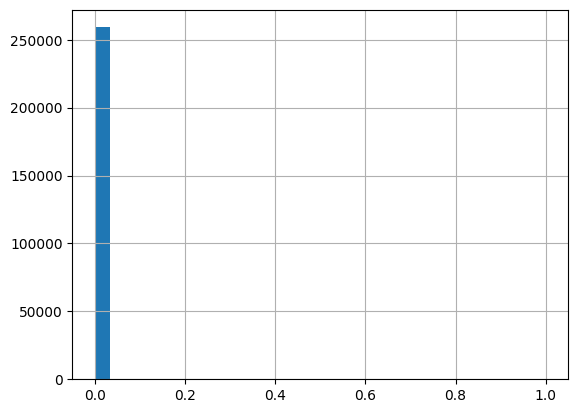

In [30]:
import matplotlib.pyplot as plt

grid["hazard_norm"].hist(bins=30)
plt.show()
